DATASET: https://archive-beta.ics.uci.edu/ml/datasets/heart+failure+clinical+records

In [125]:
import pandas as pd
columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
df = pd.read_csv('heart_failure_clinical_records_dataset2.csv', names = columns)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [126]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [127]:
#CLEAN THE DATA
for i in df.columns:
    df[i].fillna(df[i].mean(), inplace=True)

#SPLIT THE DATA
X = df.iloc[:, :12]
X = X.values
Y = df['DEATH_EVENT']
Y = Y.values.flatten()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#SCALE THE DATA 
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [128]:
""" samples = number of samples in the dataset
    b = bias
"""
class LogisticRegression:

  def __init__(self, learning_rate = 0.0075, num_iter = 500):
    self.lr = learning_rate
    self.num_iter = num_iter
    self.weights = None
    self.bias = None
  #SIGMOID
  def sigmoid(self,X):
    return 1 / (1 + np.exp(-X))

  def fit(self, X, Y):
    samples, features = X.shape

    #INITIALIZE PARAMETERS
    self.weights = np.zeros(features)
    self.bias = 0

    #GRADIENT DESCENT
    for i in range(self.num_iter):
      linear_model = np.dot(X, self.weights) + self.bias
      Y_pred = self.sigmoid(linear_model)

      dW = (1 / samples) * np.dot(X.T, (Y_pred - Y))
      db = (1 / samples) * np.sum(Y_pred - Y)
      
      #UPDATE
      self.weights -= self.lr * dW
      self.bias -= self.lr * db
   
  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    predictions = self.sigmoid(linear_model)
    Y_pred = [1 if i > 0.5 else 0 for i in predictions]
    return np.array(Y_pred) 

In [129]:
LR_train = LogisticRegression(0.0095, 900)
LR_train.fit(X_train, Y_train)

predictions_train = LR_train.predict(X_train)

def accuracy (y_true,y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("Accuracy: ", accuracy(Y_train, predictions_train))

Accuracy:  0.8410041841004184


In [130]:
LR_test = LogisticRegression(0.0095, 900)
LR_test.fit(X_test, Y_test)

predictions_test = LR_test.predict(X_test)

def accuracy (y_true,y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("Accuracy: ", accuracy(Y_test, predictions_test))

Accuracy:  0.9166666666666666


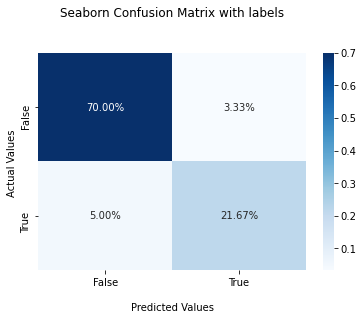

In [131]:
Y_pred = predictions_test
#CREATE THE CONFUSION MATRIX
cf_matrix = confusion_matrix(Y_test, Y_pred)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()